In [1]:
%matplotlib notebook

In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
pathHR = 'HR_comma_sep.csv'
df_HR = pd.read_csv(pathHR)
df_HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Data Cleaning

In [4]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Note dataset has no specific ID variable such as employee ID.
# Check frequency for different variables

df_HR['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
## Employees in each department
df_HR['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
df_HR.rename(columns={'sales':'Departments'}, inplace = True)
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# Align coding for variables with those from EmployeeAttrition.csv (and related dfs)
## In EmployeeAttrition.csv: 1 = Stayers, 2 = Leavers
## In current dataset: 1 = Left; 0 = Stay. Code below amends any deviation.

df_HR['left'] = df_HR['left'].replace({1: 2})
df_HR['left'] = df_HR['left'].replace({0: 1})
df_HR['left'].value_counts()

1    11428
2     3571
Name: left, dtype: int64

In [9]:
# Align column name with similar variable from EmployeeAttrition.csv

df_HR.rename(columns={'left':'Current_status'}, inplace = True)
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,2,0,sales,low
1,0.80,0.86,5,262,6,0,2,0,sales,medium
2,0.11,0.88,7,272,4,0,2,0,sales,medium
3,0.72,0.87,5,223,5,0,2,0,sales,low
4,0.37,0.52,2,159,3,0,2,0,sales,low


In [10]:
df_HR['Current_status'].value_counts()

1    11428
2     3571
Name: Current_status, dtype: int64

## Turnover Count
11428 Stayers & 3571 Leavers

In [11]:
df_HR.describe().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,1.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,1.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,1.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,1.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,1.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,2.000,1.000


# DESCRIPTIVE STATISTICS & GROUPBY SUMMARIES

In [12]:
# Descriptive Statistics for entire dataset
## satisfaction_level: 0-1
## last_evaluation: 0-1
## number_project: up to 7
## time_spend_company: up to 10

HR_sumStats = pd.DataFrame(df_HR[["satisfaction_level",
                                  "last_evaluation",
                                  "number_project",
                                  "average_montly_hours",
                                  "time_spend_company"]].mean().round(3))

HR_sumStats.rename(columns={0:'Mean'}, inplace = True)
HR_sumStats

,Mean
satisfaction_level,0.613
last_evaluation,0.716
number_project,3.803
average_montly_hours,201.050
time_spend_company,3.498


In [13]:
# Descriptive Statistics by Stayers vs Leavers
## values_count() for Work_accident, promotion_last_5years, Departments

HR_byStayLeave = df_HR.groupby('Current_status').mean()
# HR_sumStats_byStayLeave = pd.DataFrame(HR_byStayLeave[["satisfaction_level", "last_evaluation",
#                                                    "number_project","average_montly_hours",
#                                                     "time_spend_company"]]).aggregate([np.mean, np.median, np.var, np.std].round(2))

# HR_sumStats_byStayLeave

HR_byStayLeave

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Current_status,,,,,,,
1,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
2,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [14]:
HR_byStayLeaveTP = HR_byStayLeave.transpose()
HR_byStayLeaveTP

Current_status,1,2
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


In [15]:
# Descriptive Statistics by Stayers vs Leavers

HR_byDepts = df_HR.groupby('Departments').aggregate([np.mean, np.median])
HR_byDepts

satisfaction_level        last_evaluation        number_project  \
                          mean median            mean median           mean   
Departments                                                                   
IT                    0.618142  0.660        0.716830   0.72       3.816626   
RandD                 0.619822  0.650        0.712122   0.71       3.853875   
accounting            0.582151  0.610        0.717718   0.73       3.825293   
hr                    0.598809  0.610        0.708850   0.72       3.654939   
management            0.621349  0.655        0.724000   0.73       3.860317   
marketing             0.618601  0.640        0.715886   0.71       3.687646   
product_mng           0.619634  0.640        0.714756   0.72       3.807095   
sales                 0.614447  0.640        0.709717   0.70       3.776329   
support               0.618300  0.650        0.723109   0.74       3.803948   
technical             0.607897  0.640        0.721099   0.73       3.877941   

                   average_montly_hours        time_spend_company         \
            median                 mean median               mean median   
Departments                                                                
IT               4           202.215974    199           3.468623      3   
RandD            4           200.800508    200           3.367217      3   
accounting       4           201.162973    199           3.522816      3   
hr               4           198.684709    197           3.355886      3   
management       4           201.249206    204           4.303175      3   
marketing        4           199.385781    198           3.569930      3   
product_mng      4           199.965632    198           3.475610      3   
sales            4           200.911353    201           3.534058      3   
support          4           200.758188    200           3.393001      3   
technical        4           202.497426    201           3.411397      3   

            Work_accident        Current_status        promotion_last_5years  \
                     mean median           mean median                  mean   
Departments                                                                    
IT               0.133659      0       1.222494      1              0.002445   
RandD            0.170267      0       1.153748      1              0.034307   
accounting       0.125163      0       1.265971      1              0.018253   
hr               0.120433      0       1.290934      1              0.020298   
management       0.163492      0       1.144444      1              0.109524   
marketing        0.160839      0       1.236597      1              0.050117   
product_mng      0.146341      0       1.219512      1              0.000000   
sales            0.141787      0       1.244928      1              0.024155   
support          0.154778      0       1.248991      1              0.008973   
technical        0.140074      0       1.256250      1              0.010294   

                    
            median  
Departments         
IT               0  
RandD            0  
accounting       0  
hr               0  
management       0  
marketing        0  
product_mng      0  
sales            0  
support          0  
technical        0

In [16]:
HR_byDeptsTP = HR_byDepts.transpose()
HR_byDeptsTP

Departments                           IT       RandD  accounting          hr  \
satisfaction_level    mean      0.618142    0.619822    0.582151    0.598809   
                      median    0.660000    0.650000    0.610000    0.610000   
last_evaluation       mean      0.716830    0.712122    0.717718    0.708850   
                      median    0.720000    0.710000    0.730000    0.720000   
number_project        mean      3.816626    3.853875    3.825293    3.654939   
                      median    4.000000    4.000000    4.000000    4.000000   
average_montly_hours  mean    202.215974  200.800508  201.162973  198.684709   
                      median  199.000000  200.000000  199.000000  197.000000   
time_spend_company    mean      3.468623    3.367217    3.522816    3.355886   
                      median    3.000000    3.000000    3.000000    3.000000   
Work_accident         mean      0.133659    0.170267    0.125163    0.120433   
                      median    0.000000    0.000000    0.000000    0.000000   
Current_status        mean      1.222494    1.153748    1.265971    1.290934   
                      median    1.000000    1.000000    1.000000    1.000000   
promotion_last_5years mean      0.002445    0.034307    0.018253    0.020298   
                      median    0.000000    0.000000    0.000000    0.000000   

Departments                   management   marketing  product_mng       sales  \
satisfaction_level    mean      0.621349    0.618601     0.619634    0.614447   
                      median    0.655000    0.640000     0.640000    0.640000   
last_evaluation       mean      0.724000    0.715886     0.714756    0.709717   
                      median    0.730000    0.710000     0.720000    0.700000   
number_project        mean      3.860317    3.687646     3.807095    3.776329   
                      median    4.000000    4.000000     4.000000    4.000000   
average_montly_hours  mean    201.249206  199.385781   199.965632  200.911353   
                      median  204.000000  198.000000   198.000000  201.000000   
time_spend_company    mean      4.303175    3.569930     3.475610    3.534058   
                      median    3.000000    3.000000     3.000000    3.000000   
Work_accident         mean      0.163492    0.160839     0.146341    0.141787   
                      median    0.000000    0.000000     0.000000    0.000000   
Current_status        mean      1.144444    1.236597     1.219512    1.244928   
                      median    1.000000    1.000000     1.000000    1.000000   
promotion_last_5years mean      0.109524    0.050117     0.000000    0.024155   
                      median    0.000000    0.000000     0.000000    0.000000   

Departments                      support   technical  
satisfaction_level    mean      0.618300    0.607897  
                      median    0.650000    0.640000  
last_evaluation       mean      0.723109    0.721099  
                      median    0.740000    0.730000  
number_project        mean      3.803948    3.877941  
                      median    4.000000    4.000000  
average_montly_hours  mean    200.758188  202.497426  
                      median  200.000000  201.000000  
time_spend_company    mean      3.393001    3.411397  
                      median    3.000000    3.000000  
Work_accident         mean      0.154778    0.140074  
                      median    0.000000    0.000000  
Current_status        mean      1.248991    1.256250  
                      median    1.000000    1.000000  
promotion_last_5years mean      0.008973    0.010294  
                      median    0.000000    0.000000

<IPython.core.display.Javascript object>


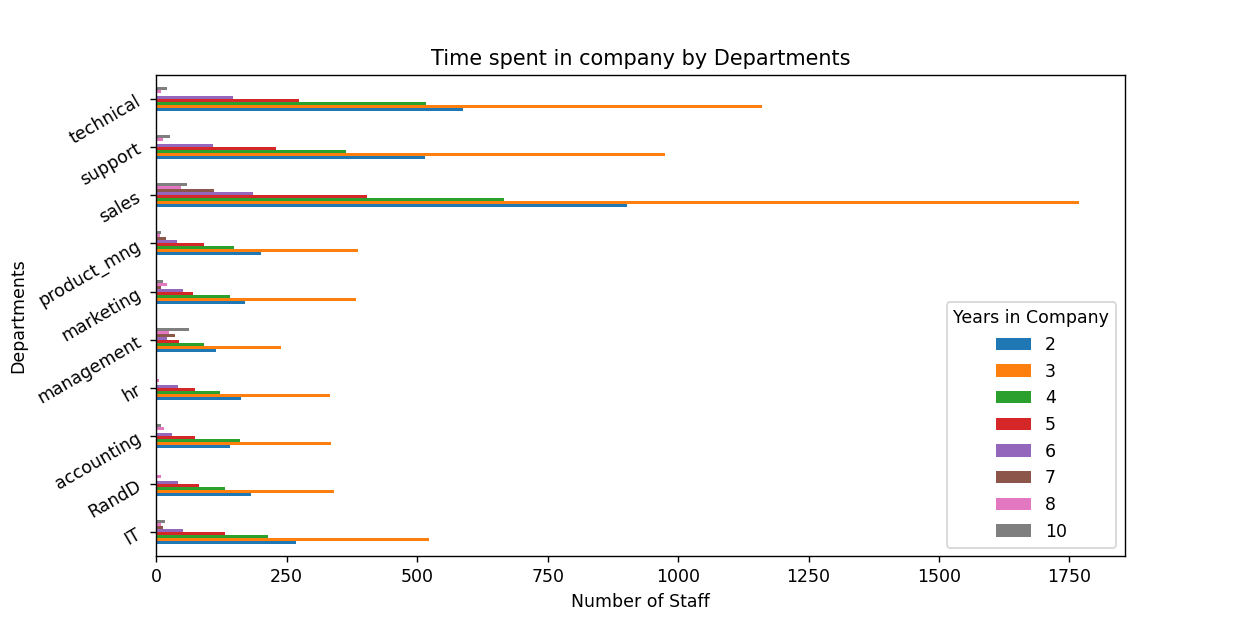

In [17]:
# Compare tenure by department
## Bar Chart
### 10 Departments & 10 Levels of 'time_spend_company'

timeCompany_depts = df_HR.groupby(['Departments','time_spend_company'])['time_spend_company'].count().unstack('time_spend_company').reset_index()

ax = timeCompany_depts.plot.barh(x = 'Departments', rot = 30, figsize = (10,5))
plt.title("Time spent in company by Departments")
plt.ylabel("Departments")
plt.xlabel("Number of Staff")
plt.legend(title = 'Years in Company')
plt.show()


## Comments on time_spend_company by Departments

Most of the employees, across all the departments, have stayed with the company for about 3 years.

In [18]:
# Count number of employees who did/did not receive a promotion in the last 5 years.

df_HR['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [19]:
# Descriptive Statistics by employees who did/did not receiver a promotion in the last 5 years.

HR_byPromolst5yrs = df_HR.groupby('promotion_last_5years').aggregate([np.mean, np.median])
HR_byPromolst5yrs

satisfaction_level        last_evaluation         \
                                    mean median            mean median   
promotion_last_5years                                                    
0                               0.611895   0.64        0.716321   0.72   
1                               0.656019   0.68        0.706019   0.71   

                      number_project        average_montly_hours         \
                                mean median                 mean median   
promotion_last_5years                                                     
0                           3.804155      4           201.076431    200   
1                           3.752351      4           199.849530    206   

                      time_spend_company        Work_accident         \
                                    mean median          mean median   
promotion_last_5years                                                  
0                               3.483719      3      0.142575      0   
1                               4.166144      3      0.238245      0   

                      Current_status         
                                mean median  
promotion_last_5years                        
0                           1.241962      1  
1                           1.059561      1

In [20]:
# HR_byPromolst5yrs.rename(columns={0:'Not promoted in last 5 years',
#                                   1:'Promoted in the last 5 years'}, inplace = True)

HR_byPromolst5yrs.transpose()

promotion_last_5years                 0           1
satisfaction_level   mean      0.611895    0.656019
                     median    0.640000    0.680000
last_evaluation      mean      0.716321    0.706019
                     median    0.720000    0.710000
number_project       mean      3.804155    3.752351
                     median    4.000000    4.000000
average_montly_hours mean    201.076431  199.849530
                     median  200.000000  206.000000
time_spend_company   mean      3.483719    4.166144
                     median    3.000000    3.000000
Work_accident        mean      0.142575    0.238245
                     median    0.000000    0.000000
Current_status       mean      1.241962    1.059561
                     median    1.000000    1.000000

## Investigation on possible unfair rewards

On average, performance of those who did not receive a promotion in the last 5 years (0.716/1) was greater than those who received a promotion in the last 5 years (0.706019).

In [21]:
HR_by_promo_left = df_HR.groupby(['promotion_last_5years','Current_status']).aggregate([np.mean, np.median])
HR_by_promo_left

satisfaction_level         \
                                                   mean median   
promotion_last_5years Current_status                             
0                     1                        0.666766  0.690   
                      2                        0.439992  0.410   
1                     1                        0.668433  0.695   
                      2                        0.460000  0.440   

                                     last_evaluation        number_project  \
                                                mean median           mean   
promotion_last_5years Current_status                                         
0                     1                     0.715527  0.715       3.786395   
                      2                     0.718806  0.790       3.859797   
1                     1                     0.713467  0.710       3.796667   
                      2                     0.588421  0.560       3.052632   

                                            average_montly_hours         \
                                     median                 mean median   
promotion_last_5years Current_status                                      
0                     1                   4           199.001168  198.0   
                      2                   4           207.577984  224.5   
1                     1                   4           201.250000  208.0   
                      2                   2           177.736842  160.0   

                                     time_spend_company        Work_accident  \
                                                   mean median          mean   
promotion_last_5years Current_status                                           
0                     1                        3.357297      3      0.173257   
                      2                        3.879786      4      0.046453   
1                     1                        4.223333      3      0.240000   
                      2                        3.263158      3      0.210526   

                                             
                                     median  
promotion_last_5years Current_status         
0                     1                   0  
                      2                   0  
1                     1                   0  
                      2                   0

Current_status: 1 = Stayers, 2 = Leavers 
promotion_last_5years: 1 = Yes; 0 = No
2x2 comparison

## Observation 1: No - promotion_last_5years & Leave Org

Subset's mean rating on their last_evaluation was the highest out of all groups. They may have left because they didn't received a promotion in the last 5 years despite being on average the top performers (last_evaluation: 0.718806).

This same subset was working more than the others as well (average_montly_hours = 207.577).

In [22]:
# # Compare tenure by Current_status
# ## Bar Chart
# ### 1 = Stayers, 2 = Leavers

# timeCompany_left = df_HR.groupby(['Current_status','time_spend_company'])['time_spend_company'].count().unstack('time_spend_company').reset_index()

# ax = timeCompany_left.plot.bar(y = 'Current_status', rot = 0, figsize = (10,5))
# plt.title("Time spent in company by Departments")
# plt.ylabel("Current_status")
# plt.xlabel("Number of Staff")
# plt.legend(title = 'Years in Company')
# plt.show()

# Summary Points from above (TBC)

# CORRELATIONS & RELATIONAL PLOTS

Fig1 number_projects x Salary

In [23]:
df_HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Current_status,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,2,0,sales,low
1,0.80,0.86,5,262,6,0,2,0,sales,medium
2,0.11,0.88,7,272,4,0,2,0,sales,medium
3,0.72,0.87,5,223,5,0,2,0,sales,low
4,0.37,0.52,2,159,3,0,2,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,2,0,support,low
14995,0.37,0.48,2,160,3,0,2,0,support,low
14996,0.37,0.53,2,143,3,0,2,0,support,low
14997,0.11,0.96,6,280,4,0,2,0,support,low


In [24]:
# # Ax_salary = np.arange(len(df_HR['salary']))
# print(x_salary)

In [25]:
# y_projects = df_HR('number_project')

In [26]:
# refer to Matplotlib_1/08-Stu_PyBars/Solved

Fig2 average_montly_hours x satisfaction_level

# ANALYSIS

In [27]:
# Research Question: 1) Why do valuable employees leave?